In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement.io import npy
from kid_readout.measurement import temperature
from kid_readout.analysis.resonator.plot_resonator import amplitude

In [3]:
npd = npy.NumpyDirectory('/data/detectors/2016-10-25_141727_sweep_stream_on_off/')

In [4]:
npd.node_names()

['SingleSweepStream0',
 'SingleSweep1',
 'SingleStream2',
 'ADCSnap3',
 'SingleSweepStream4',
 'SingleSweep5',
 'SingleStream6',
 'ADCSnap7',
 'SingleSweepStream8',
 'SingleSweep9',
 'SingleStream10',
 'ADCSnap11',
 'SingleSweepStream12',
 'SingleSweep13',
 'SingleStream14',
 'ADCSnap15',
 'SingleSweepStream16',
 'SingleSweep17',
 'SingleStream18',
 'ADCSnap19',
 'SingleSweepStream20',
 'SingleSweep21',
 'SingleStream22',
 'ADCSnap23',
 'SingleSweepStream24',
 'SingleSweep25',
 'SingleStream26',
 'ADCSnap27',
 'SingleSweepStream28',
 'SingleSweep29',
 'SingleStream30',
 'ADCSnap31',
 'SingleSweepStream32',
 'SingleSweep33',
 'SingleStream34',
 'ADCSnap35',
 'SingleSweepStream36',
 'SingleSweep37',
 'SingleStream38',
 'ADCSnap39',
 'SingleSweepStream40',
 'SingleSweep41',
 'SingleStream42',
 'ADCSnap43',
 'SingleSweepStream44',
 'SingleSweep45',
 'SingleStream46',
 'ADCSnap47',
 'SingleSweepStream48',
 'SingleSweep49',
 'SingleStream50',
 'ADCSnap51',
 'SingleSweepStream52',
 'SingleSwe

In [5]:
all_sss = [npd.read(name) for name in npd.node_names() if name.startswith('SingleSweepStream')]

In [6]:
all_snaps = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]

In [7]:
[(snap.x.ptp(), snap.y.ptp()) for snap in all_snaps]

[(170.0, 181.0),
 (64.0, 67.0),
 (28.0, 37.0),
 (20.0, 26.0),
 (119.0, 127.0),
 (44.0, 49.0),
 (22.0, 28.0),
 (20.0, 23.0),
 (127.0, 124.0),
 (52.0, 50.0),
 (22.0, 25.0),
 (17.0, 19.0),
 (60.0, 64.0),
 (25.0, 24.0),
 (14.0, 16.0),
 (12.0, 13.0),
 (53.0, 53.0),
 (24.0, 21.0),
 (14.0, 16.0),
 (11.0, 12.0),
 (42.0, 42.0),
 (19.0, 18.0),
 (14.0, 11.0),
 (11.0, 12.0),
 (38.0, 41.0),
 (17.0, 19.0),
 (14.0, 11.0),
 (12.0, 11.0)]

In [8]:
for sss in all_sss:
    temperature.add_temperature(sss, cryostat='hpd')

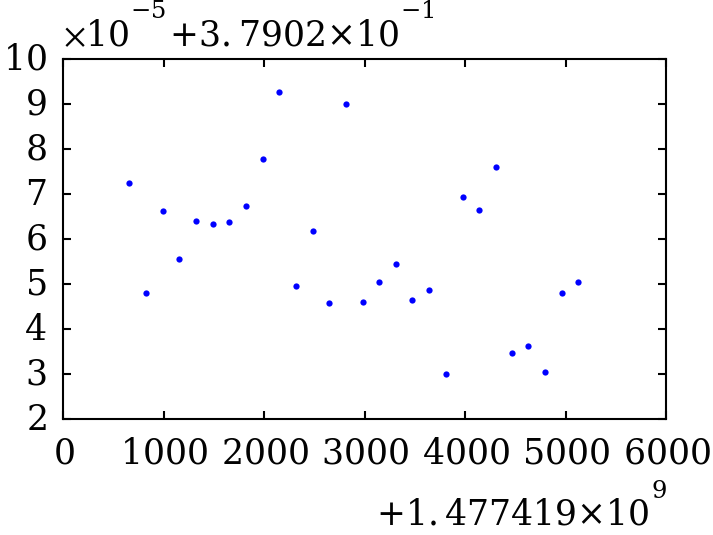

In [9]:
fig, ax = plt.subplots()
ax.plot([sss.stream.epoch for sss in all_sss],
        [sss.state.temperature.package for sss in all_sss],
        '.b')

In [10]:
df = pd.concat([sss.to_dataframe() for sss in all_sss])
np.save(npd.root_path.split('/')[-2] + '.npy', df.to_records())
df.shape

(28, 69)

In [11]:
num_channels = 7
sss_dict = {}
for channel in range(num_channels):
    sss_dict[channel] = [sss for sss in all_sss if sss.state.lo_index == channel]

In [12]:
sss_dict

{0: [<kid_readout.measurement.basic.SingleSweepStream at 0x7fd690c147d0>,
 1: [<kid_readout.measurement.basic.SingleSweepStream at 0x7fd68d2ace90>,
 2: [<kid_readout.measurement.basic.SingleSweepStream at 0x7fd68cedca10>,
 3: [<kid_readout.measurement.basic.SingleSweepStream at 0x7fd68cb68590>,
 4: [<kid_readout.measurement.basic.SingleSweepStream at 0x7fd68c82c0d0>,
 5: [<kid_readout.measurement.basic.SingleSweepStream at 0x7fd68b4d2c50>,
 6: [<kid_readout.measurement.basic.SingleSweepStream at 0x7fd68b0ef7d0>,
  <kid_readout.measurement.basic.SingleSweepStream at 0x7fd68ae94bd0>]}

Qi: 9398; Qc: 20225
Qi: 9164; Qc: 20272
Qi: 9117; Qc: 20296
Qi: 9103; Qc: 20408


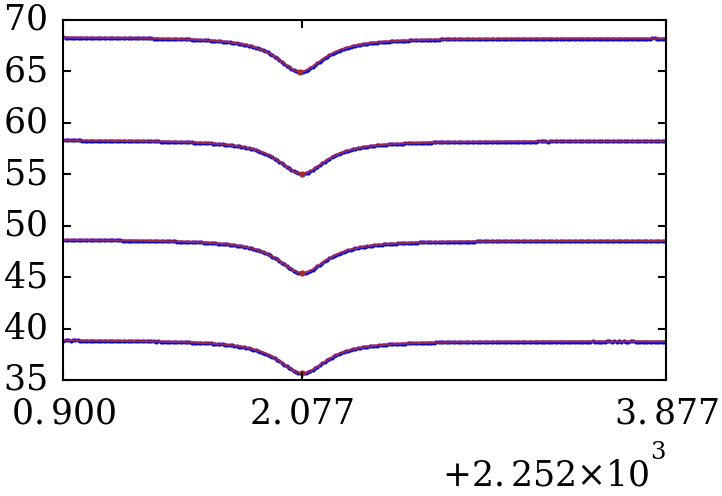

In [13]:
channel = 0
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real))

Qi: 6691; Qc: 37366
Qi: 6653; Qc: 37555
Qi: 6625; Qc: 37485
Qi: 6594; Qc: 37624


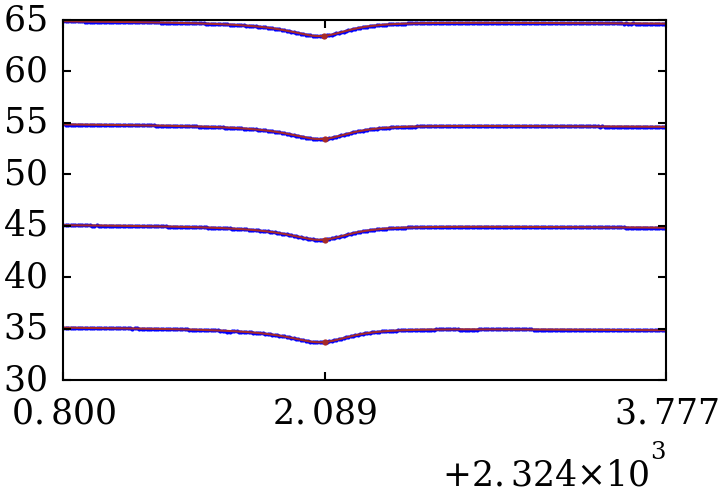

In [14]:
channel = 1
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real))

Qi: 8366; Qc: 3657
Qi: 8244; Qc: 3787
Qi: 9362; Qc: 4552
Qi: 11256; Qc: 6038


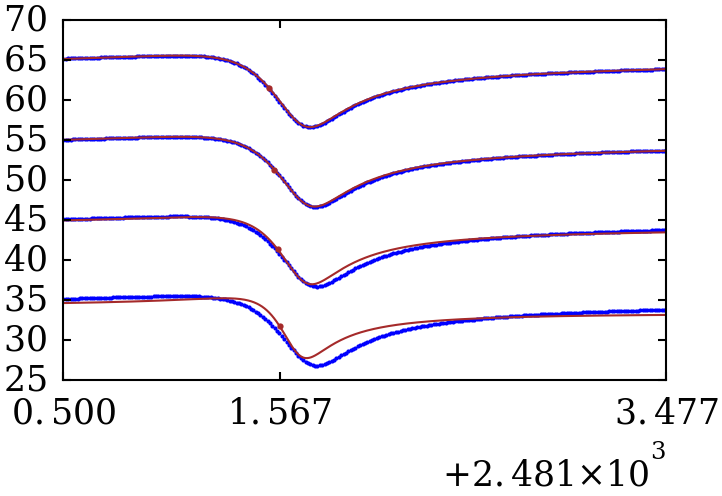

In [15]:
channel = 2
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real))

Qi: 6986; Qc: 191445
Qi: 6794; Qc: 188265
Qi: 6945; Qc: 191794
Qi: 6539; Qc: 176707


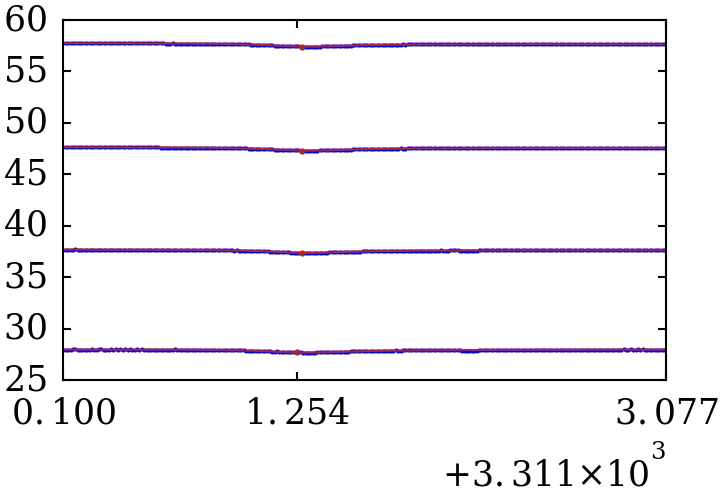

In [16]:
channel = 3
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real))

Qi: 6690; Qc: 50641
Qi: 6642; Qc: 50989
Qi: 6636; Qc: 50718
Qi: 6565; Qc: 50912


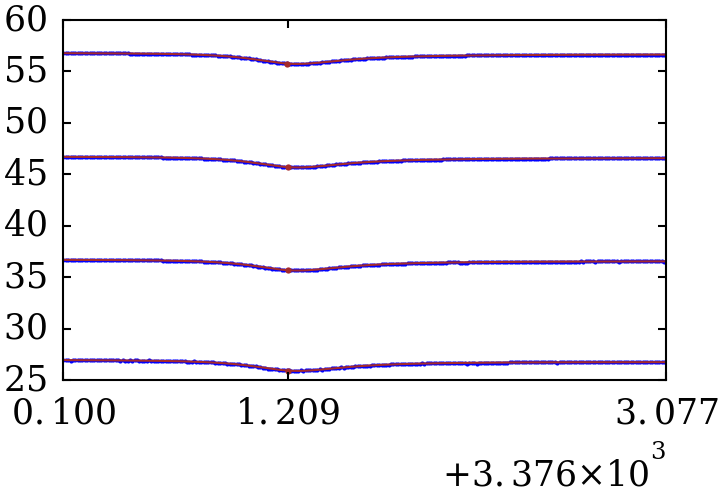

In [17]:
channel = 4
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real))

Qi: 7072; Qc: 32437
Qi: 6456; Qc: 28414
Qi: 6420; Qc: 28525
Qi: 6457; Qc: 29110


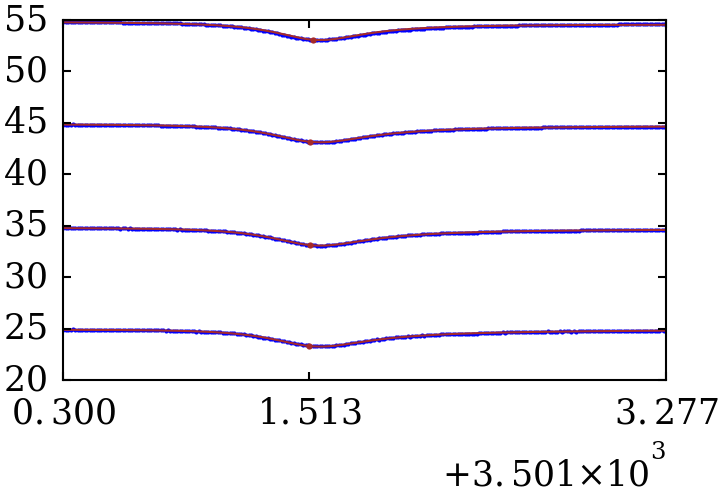

In [18]:
channel = 5
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real))

Qi: 6272; Qc: 28496
Qi: 6276; Qc: 28641
Qi: 6291; Qc: 29134
Qi: 6278; Qc: 30072


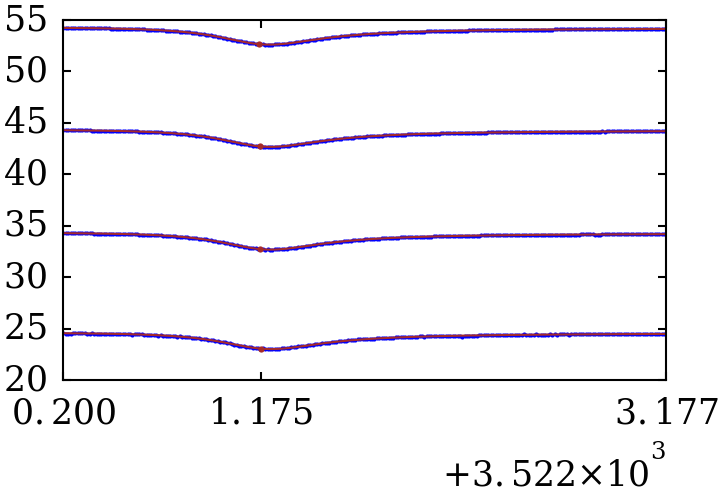

In [19]:
channel = 6
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real))

In [20]:
f_scale = 1e-9
Qi_color = 'blue'
Qc_color = 'green'

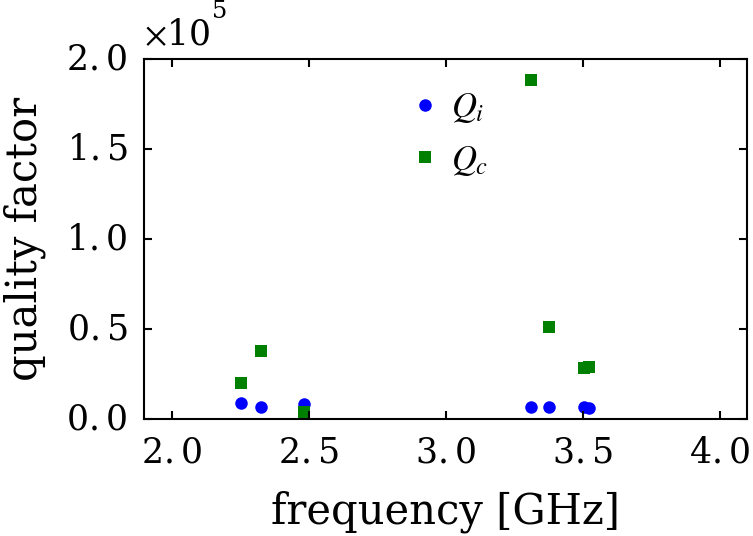

In [21]:
attenuation_index = 1
fig, ax = plt.subplots()
sssl = [sss_list[attenuation_index] for sss_list in sss_dict.values()]
ax.plot([f_scale * sss.resonator.f_0 for sss in sssl],
        [sss.resonator.Q_i for sss in sssl],
        'o', color=Qi_color, label='$Q_i$')
ax.plot([f_scale * sss.resonator.f_0 for sss in sssl],
        [sss.resonator.Q_e_real for sss in sssl],
        's', color=Qc_color, label='$Q_c$')

ax.set_xlabel('frequency [GHz]')
ax.set_ylabel('quality factor')
ax.legend(loc='upper center', numpoints=1)
ax.set_xlim(1.9, 4.1);

#fig.savefig('/home/flanigan/temp/2016-08-11_TwoLayer02-0304_Qi_and_Qc_vs_fr.pdf')

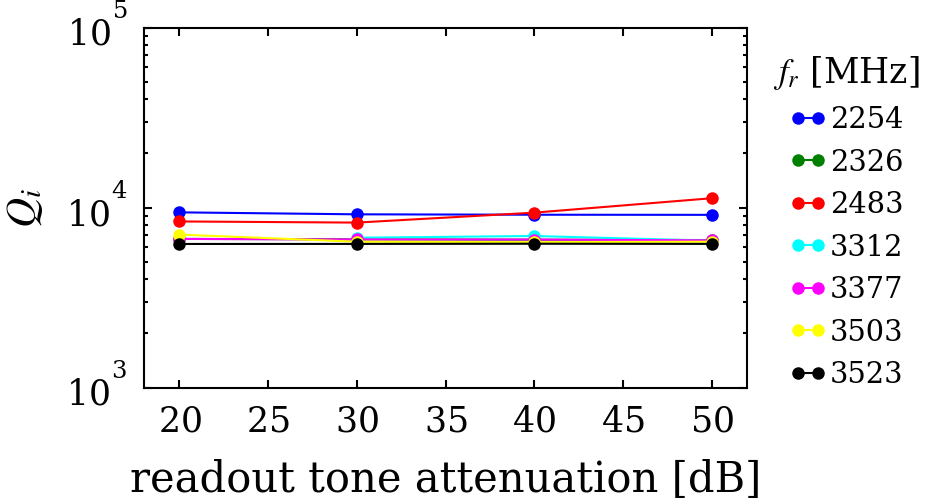

In [22]:
first_good_attenuations = 3 * [0] + [1] + 3 * [0]
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'gray']

fig, ax = plt.subplots()
ax.set_yscale('log')
ax.set_ylabel('$Q_i$')
ax.set_xlabel('readout tone attenuation [dB]')

for channel in range(num_channels):
    sssl = sss_dict[channel][first_good_attenuations[channel]:]
    ax.plot([sss.stream.roach_state.dac_attenuation for sss in sssl],
             [sss.resonator.Q_i for sss in sssl],
            '-', marker='o', color=colors[channel], label='{:.0f}'.format(1e-6 * sssl[-1].resonator.f_0))

legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='xx-small', title=r'$f_r$ [MHz]');
legend.get_title().set_fontsize('x-small')
ax.set_xlim(18, 52);

#fig.savefig('/home/flanigan/temp/Qi_vs_atten.pdf')

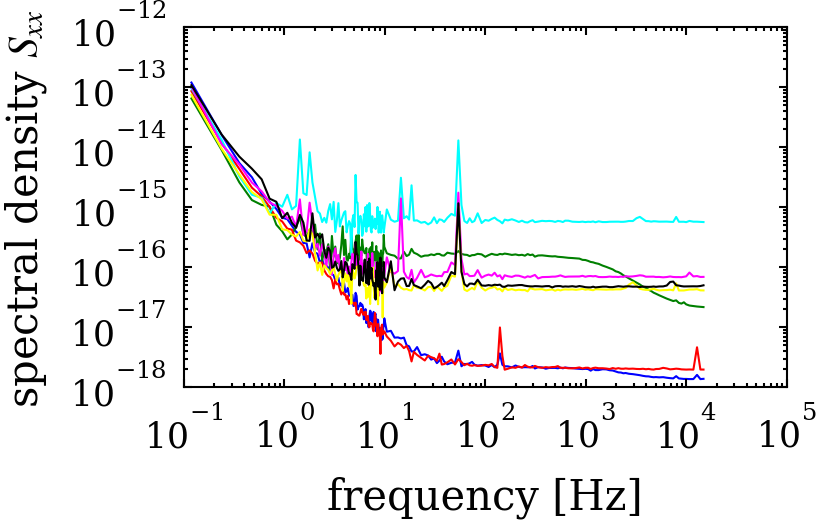

In [23]:
attenuation_index = 0

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('spectral density $S_{xx}$')

for channel, sssl in sss_dict.items():
    sss = sssl[attenuation_index]
    sss.set_S(binned=True)
    ax.plot(sss.S_frequency, sss.S_xx, color=colors[channel])

#fig.savefig('/home/flanigan/temp/2016-08-11_TwoLayer02-0304_all_Sxx_vs_frequency_at_30dB.pdf', bbox_inches='tight')

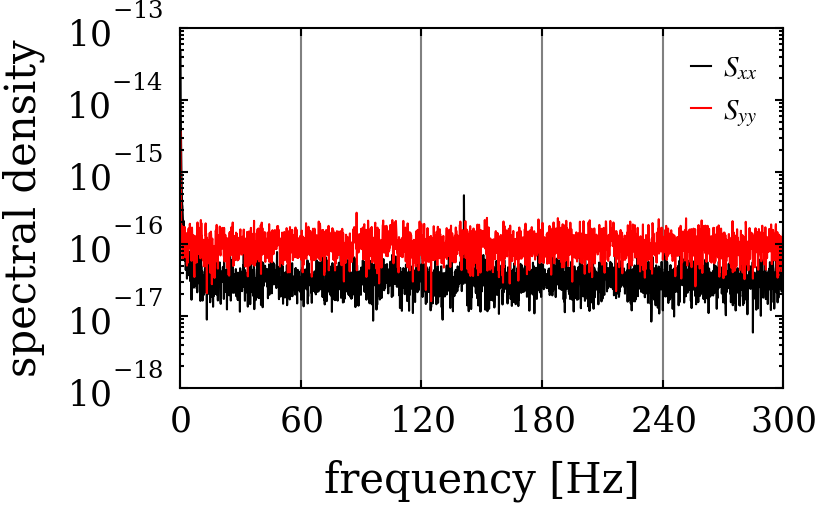

In [24]:
attenuation_index = 1
channel = 2
sss = sss_dict[channel][attenuation_index]
sss.set_S(binned=False)
fig, ax = plt.subplots()
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('spectral density')
ax.set_yscale('log')
ax.set_xticks([0, 60, 120, 180, 240, 300])

for f in [60, 120, 180, 240]:
    ax.axvline(f, color='gray')
ax.plot(sss.S_frequency, sss.S_xx, color='k', label='$S_{xx}$')
ax.plot(sss.S_frequency, sss.S_yy, color='r', label='$S_{yy}$')
ax.legend(loc='upper right', ncol=1, fontsize='xx-small')

ax.set_xlim(0, 300);
#fig.savefig('/home/flanigan/temp/2016-08-11_TwoLayer02-0304_channel_0_Sxx_Syy_vs_frequency.pdf', bbox_inches='tight')